In [4]:
import os
os.chdir("F://buffalo//buffalo project//time_series//singapor_labor")

In [5]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import statsmodels as sm
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [9]:
data= pd.read_csv("singapore.csv",
                  header=0,
                  names=['year','inflation'],
                  parse_dates=[0],
                  index_col=0)


In [11]:
data.tail()

,inflation
year,
24,81.900002
25,82.300003
26,82.699997
27,83.199997
28,83.500000


## converting to series

In [30]:
data_series = pd.Series(data["inflation"].values,
                        index= pd.date_range('31/12/1980',
                        periods =28,
                        freq='Y'))

In [31]:
data_series

1980-12-31    70.199997
1981-12-31    71.099998
1982-12-31    71.699997
1983-12-31    72.300003
1984-12-31    73.099998
1985-12-31    72.900002
1986-12-31    74.400002
1987-12-31    75.400002
1988-12-31    76.000000
1989-12-31    76.900002
1990-12-31    77.400002
1991-12-31    78.199997
1992-12-31    78.900002
1993-12-31    78.699997
1994-12-31    79.000000
1995-12-31    78.000000
1996-12-31    80.000000
1997-12-31    79.800003
1998-12-31    80.300003
1999-12-31    80.500000
2000-12-31    80.699997
2001-12-31    81.099998
2002-12-31    81.500000
2003-12-31    81.900002
2004-12-31    82.300003
2005-12-31    82.699997
2006-12-31    83.199997
2007-12-31    83.500000
Freq: A-DEC, dtype: float64

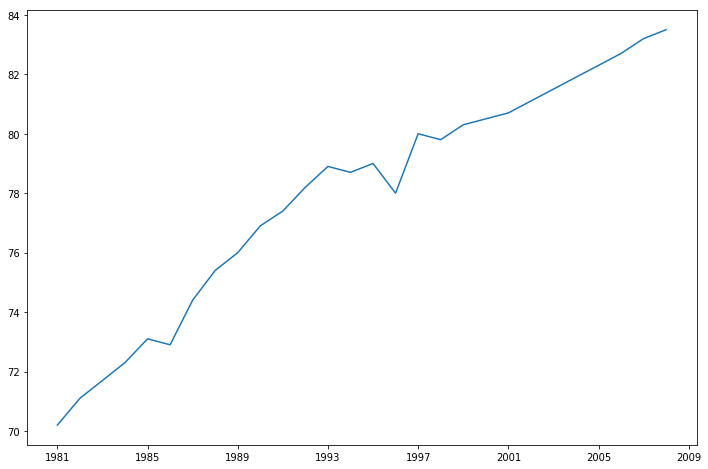

In [32]:
plt.figure(figsize=(12,8))
plt.plot(data_series)

In [33]:
def stationary_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print("Fuller Test are")
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(df_test[0:4],index = ["Test Statistic", "p-value", "#Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [34]:
stationary_test(data_series)

Fuller Test are
Test Statistic                 -2.181088
p-value                         0.213181
#Lags Used                      1.000000
Number of Observations Used    26.000000
dtype: float64


# as data is not stationary we will do diffrencing 

In [35]:
data_series_diff_1 =data_series - data_series.shift(1)
data_series_diff_1 = data_series_diff_1.dropna(inplace = False )

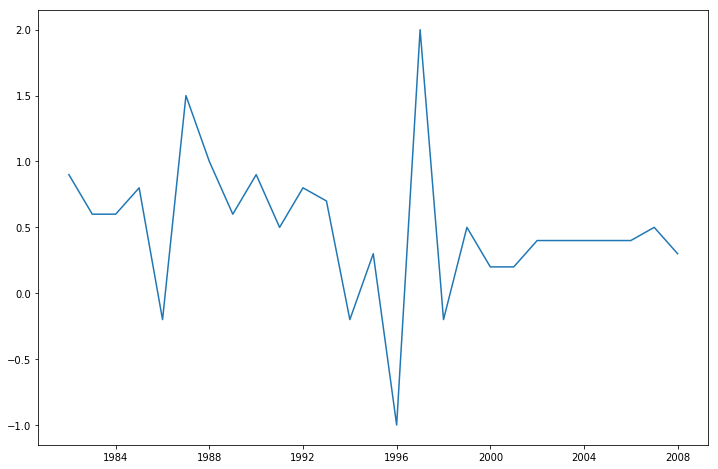

In [36]:
plt.figure(figsize=(12,8))
plt.plot(data_series_diff_1)

In [38]:
stationary_test(data_series_diff_1)

Fuller Test are
Test Statistic                -7.334932e+00
p-value                        1.102886e-10
#Lags Used                     0.000000e+00
Number of Observations Used    2.600000e+01
dtype: float64


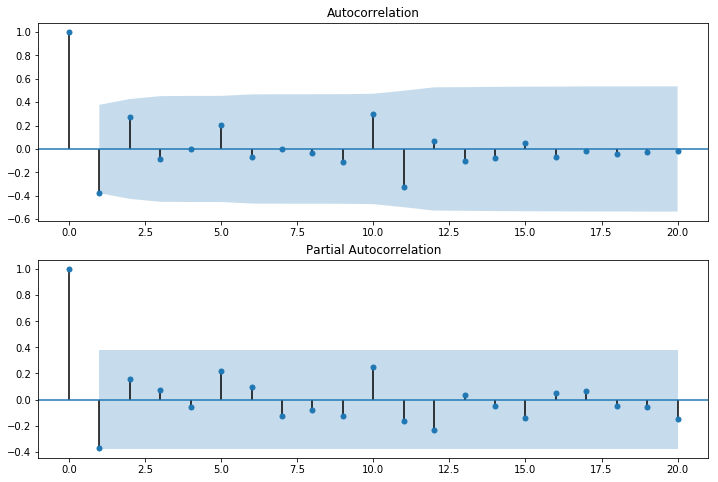

In [39]:
# Visual Test for Autocorrelation and Partial-Autocorrelation
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_series_diff_1, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_series_diff_1, lags=20, ax=ax2)

# arima model

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


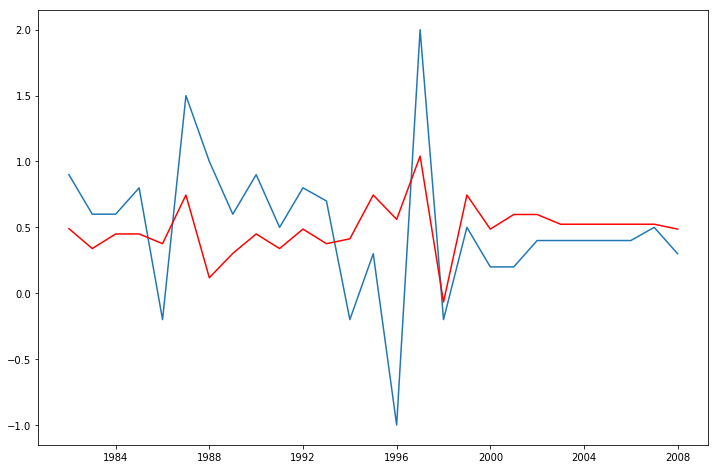

In [28]:
model_singapore = ARIMA(data_series_diff_1,order = (1,0,0))
result_AR = model_singapore.fit()
plt.figure(figsize=(12,8))
plt.plot(data_series_diff_1)
plt.plot(result_AR.fittedvalues, color='red')

In [41]:
result_AR.fittedvalues

1981-12-31    0.490404
1982-12-31    0.339243
1983-12-31    0.449959
1984-12-31    0.449956
1985-12-31    0.376150
1986-12-31    0.745196
1987-12-31    0.117813
1988-12-31    0.302338
1989-12-31    0.449959
1990-12-31    0.339243
1991-12-31    0.486863
1992-12-31    0.376150
1993-12-31    0.413051
1994-12-31    0.745199
1995-12-31    0.560672
1996-12-31    1.040437
1997-12-31   -0.066711
1998-12-31    0.745196
1999-12-31    0.486863
2000-12-31    0.597579
2001-12-31    0.597579
2002-12-31    0.523767
2003-12-31    0.523767
2004-12-31    0.523767
2005-12-31    0.523767
2006-12-31    0.523770
2007-12-31    0.486863
Freq: A-DEC, dtype: float64

In [42]:
result_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                     ARMA(1, 0)   Log Likelihood                 -20.049
Method:                       css-mle   S.D. of innovations              0.507
Date:                Thu, 11 Apr 2019   AIC                             46.098
Time:                        02:53:02   BIC                             49.985
Sample:                    12-31-1981   HQIC                            47.254
                         - 12-31-2007                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4904      0.072      6.811      0.000       0.349       0.632
ar.L1.y       -0.3690      0.176     -2.094      0.047      -0.714      -0.024
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7097           +0.0000j            2.7097            0.5000
-----------------------------------------------------------------------------
"""

# ACF on residuals

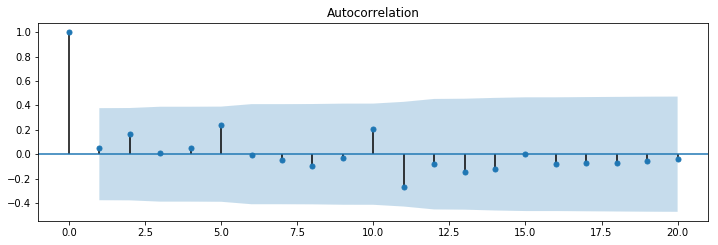

In [45]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(result_AR.resid, lags=20, ax=ax1)


# Histogram plot 

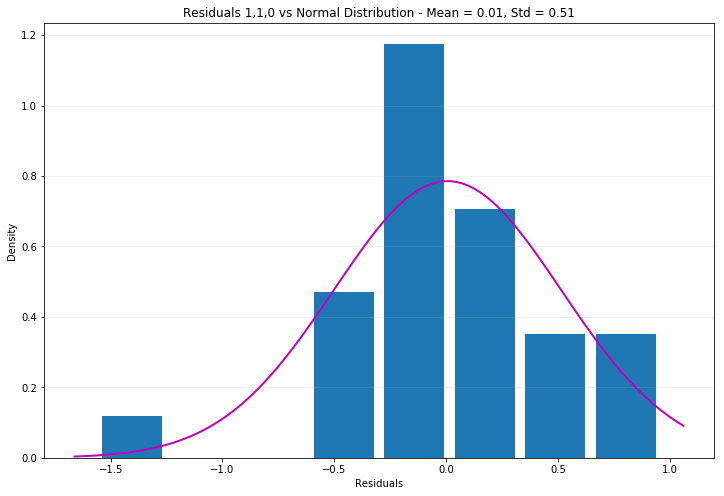

In [46]:
# Histogram of the Residuals
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(result_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(result_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 1,1,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

# switching to q as 1 with difference of 1

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


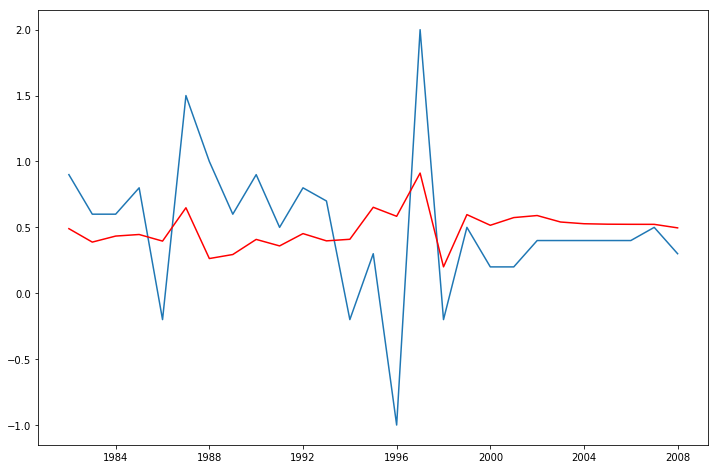

In [49]:
model_singapore = ARIMA(data_series,order = (0,1,1))
result_AR = model_singapore.fit()
plt.figure(figsize=(12,8))
plt.plot(data_series_diff_1)
plt.plot(result_AR.fittedvalues, color='red')

In [50]:
result_AR.summary()

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -20.660
Method:                       css-mle   S.D. of innovations              0.519
Date:                Thu, 11 Apr 2019   AIC                             47.320
Time:                        03:09:14   BIC                             51.207
Sample:                    12-31-1981   HQIC                            48.476
                         - 12-31-2007                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4901      0.074      6.591      0.000       0.344       0.636
ma.L1.D.y     -0.2663      0.151     -1.768      0.089      -0.562       0.029
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.7551           +0.0000j            3.7551            0.0000
-----------------------------------------------------------------------------
"""

# from the above we can see that the previous model was giving better results switching to p,d,q to 2,1,0

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


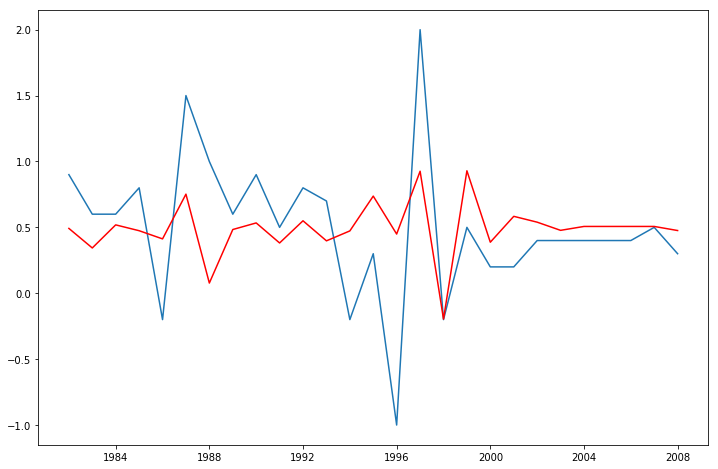

In [52]:
model_singapore = ARIMA(data_series,order = (2,1,0))
result_AR = model_singapore.fit()
plt.figure(figsize=(12,8))
plt.plot(data_series_diff_1)
plt.plot(result_AR.fittedvalues, color='red')

In [54]:
result_AR.summary()

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\home\Anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -19.740
Method:                       css-mle   S.D. of innovations              0.501
Date:                Thu, 11 Apr 2019   AIC                             47.479
Time:                        03:11:13   BIC                             52.662
Sample:                    12-31-1981   HQIC                            49.020
                         - 12-31-2007                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4920      0.083      5.925      0.000       0.329       0.655
ar.L1.D.y     -0.3099      0.188     -1.644      0.113      -0.679       0.060
ar.L2.D.y      0.1478      0.187      0.793      0.436      -0.218       0.513
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7561           +0.0000j            1.7561            0.5000
AR.2            3.8525           +0.0000j            3.8525            0.0000
-----------------------------------------------------------------------------
"""

AIC is still higher compared to when p=1 ,differencing is 1 and q as 0